In [16]:
from matplotlib import pyplot as plt
import sea2025
from part2_opf_helpers import clear_market, postprocess, make_graph, plot_graph


def process(data):
    """Solves OPF problem and displays results."""
    result = clear_market(data)
    postprocess(result)  # add fields
    graph = make_graph(result)
    print("Cycle edges:")
    print(sea2025.verification.cycle_edges(graph))
    plot_graph(graph)
    plt.show(block=False)
    return graph

In [17]:
data = sea2025.data.read("data/triangle1")

In [18]:
print(data.buses)

     id   load    x    y
0  Bus1    0.0  0.0  1.0
1  Bus2    0.0  2.0  1.0
2  Bus3  150.0  1.0  0.0


In [19]:
print(data.generators)

   id bus_id
0  G1   Bus1
1  G2   Bus2


In [20]:
print(data.lines)

  from_bus_id to_bus_id  capacity  reactance
0        Bus1      Bus2     150.0       0.25
1        Bus1      Bus3     150.0       0.25
2        Bus2      Bus3     150.0       0.25


In [21]:
print(data.offers)

  generator_id  quantity  price  tranche    id
0           G1     200.0   10.0        1  G1/1
1           G2     200.0   12.0        1  G2/1


Cycle edges:
           name  from    to   flow  reactance  delta_angle
0  Bus1Bus2Bus3  Bus1  Bus2   50.0       0.25        0.125
1  Bus1Bus2Bus3  Bus2  Bus3   50.0       0.25        0.125
2  Bus1Bus2Bus3  Bus1  Bus3  100.0       0.25       -0.250


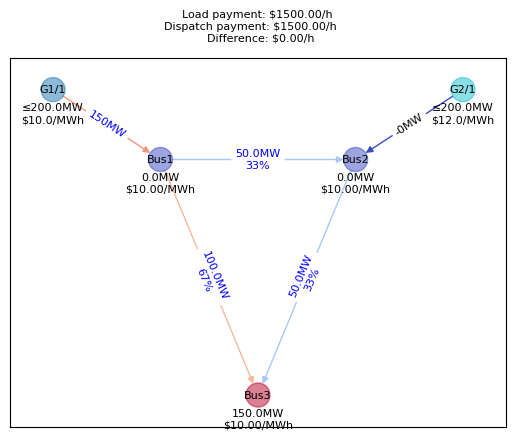

In [22]:
graph = process(data)

Cycle edges:
           name  from    to   flow  reactance  delta_angle
0  Bus1Bus2Bus3  Bus1  Bus2   50.0       0.25        0.125
1  Bus1Bus2Bus3  Bus2  Bus3   50.0       0.25        0.125
2  Bus1Bus2Bus3  Bus1  Bus3  100.0       0.25       -0.250


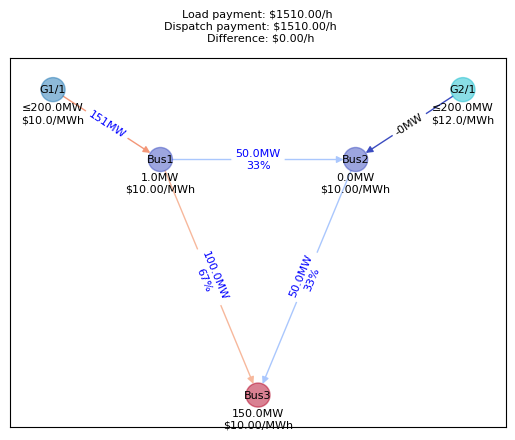

In [23]:
data.buses.at[0, "load"] += 1.0
process(data)